## Task-D: Collinear features and their effect on linear models

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/task_d.csv')

In [4]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [5]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [6]:
data.corr()   # here we are trying to findout corrlation between the feature 

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


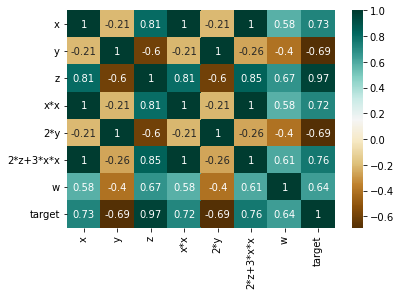

In [7]:
dataplot = sns.heatmap(data.corr(), cmap="BrBG", annot=True)     # here we have drawn the heatmap to variability in feature 


### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

**2. Finding the best model for the given data**

#Task: 1 Logistic Regression


In [8]:
alpha =  np.logspace(-5, 8, 10)                    # here i m finding the best hyperparameter with best alpha value 
print(alpha)
param_grid={'C':alpha}
logreg = LogisticRegression() # using logestic regression 

[1.00000000e-05 2.78255940e-04 7.74263683e-03 2.15443469e-01
 5.99484250e+00 1.66810054e+02 4.64158883e+03 1.29154967e+05
 3.59381366e+06 1.00000000e+08]


In [9]:
logreg = GridSearchCV(logreg, param_grid, cv=5)          # here i have used grid search cv for this problem              


In [10]:
logreg.fit(X,Y)   # FIT THE DATA 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08])})

In [11]:
logreg.best_params_     # HERE FINDING THE BEST HYPERPARAMETER 



{'C': 1e-05}

In [12]:
# the best parameter we got is 1e-05 

**3. Getting the weights with the original data**

```
# This is formatted as code
```



In [13]:
best_model=LogisticRegression(C=1e-05)   # HERE AS PER ABOVE INSTRUCTION WE HAVE USE LOGISTIC REGRESSION FOR BEST MODEL


In [14]:
best_model.fit(X,Y)      # HERE WILL FIT THE DATA


LogisticRegression(C=1e-05)

In [15]:
predictions = best_model.predict(X)   # PREDICTING THE BEST MODEL 


In [16]:

accu=accuracy_score(Y, predictions)  
# HERE PREDICTING THE ACCURACY WITH SKLEARN ACCURACY LIBRABRY 
print(accuracy_score(Y, predictions))


1.0


In [17]:
wei=best_model.coef_[0]    # HERE PRINTINNG THE COEEF OF BEST MODEL 
print(best_model.coef_)


[[ 0.00036369 -0.000345    0.00048449  0.00035933 -0.000345    0.00038189
   0.00032048]]


**4. Modifying original data**

In [18]:
X_NEW=X+.01   # adding noise as per instruction

In [19]:
updated_model=best_model.fit(X_NEW,Y)   # HERE I HAVE UPDATED THE MODEL BECAUSE OF ADDITION OF SOME NOISE VALUE AS PER INSTRUCTION 

In [20]:
prediction = best_model.predict(X_NEW)   #HERE WE WILL PREDICT THE NEW MODEL


In [21]:
new_accu=accuracy_score(Y, prediction)           # HERE WILL FIND OUT THE ACCURACY OF NEW MODEL
print(accuracy_score(Y, prediction))

1.0


In [22]:
w_new=updated_model.coef_               # HERE WE WILL PRINT THE COEF OF NEW UPDATED MODEL 
w_new

array([[ 0.00036369, -0.000345  ,  0.00048449,  0.00035933, -0.000345  ,
         0.00038189,  0.00032048]])

**5.  Checking deviations in metric and weights**

In [23]:
print(new_accu-accu)

0.0


In [24]:
difference=abs((wei-w_new))[0]
print(difference)       # SO AS PER INSTRUCTION HERE WILL CHECK THE DIFFERENCE 


[3.04544419e-11 3.04711950e-11 3.04588067e-11 3.04540617e-11
 3.04711950e-11 3.04543616e-11 3.04569679e-11]


In [25]:
n=len(data.columns)-1
percentage_change=[]
for i in range (n):   
                  # calulating the percentage change in weight
    cp=(difference[i]/wei[i])*100
    percentage_change.append(cp)

In [26]:
columns=list(data.columns.values)
# using lambda function to print sorted most imp featurres 
indices=sorted(range(len(percentage_change)), key=lambda i: percentage_change[i])[-4:]       # HERE USING THE LAMBDA 
print("the top 4 features which have higher % change in weights ")               # HERE WE ARE PRINTING THE TOP 4 FEATURE WHICH ARE HIGHLY COLLINEAR 
for K in indices:
    print(columns[K])

the top 4 features which have higher % change in weights 
2*z+3*x*x
x
x*x
w


# **feature 2*z+3*x*x has higher change after adding noise** 

#**Task: 2 Linear SVM**

**2. Finding the best model for the given data**

In [27]:
alpha =  np.logspace(-5, 8, 10)                   #  # here i m finding the best hyperparameter with best alpha value 
print(alpha)
param_grid={'C':alpha}
svm = SVC(kernel="linear")

[1.00000000e-05 2.78255940e-04 7.74263683e-03 2.15443469e-01
 5.99484250e+00 1.66810054e+02 4.64158883e+03 1.29154967e+05
 3.59381366e+06 1.00000000e+08]


In [28]:
model = GridSearchCV(svm, param_grid, cv=5)                   # here i have used grid search cv for this problem


In [29]:
model.fit(X,Y)                            # FIT THE DATA 

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08])})

In [30]:
model.best_params_                                            # HERE FINDING THE BEST HYPERPARAMETER 

{'C': 0.007742636826811269}

**3. Getting the weights with the original data**


In [31]:
best_model=SVC(kernel='linear',C=0.007742636826811269)            # HERE AS PER ABOVE INSTRUCTION WE HAVE USE LINEAR SVM  FOR BEST MODEL



In [32]:
best_model.fit(X,Y)                                 # HERE WILL FIT THE DATA

SVC(C=0.007742636826811269, kernel='linear')

In [33]:
predictions = best_model.predict(X)                                             # PREDICTING THE BEST MODEL 


In [34]:
accu=accuracy_score(Y, predictions)
print(accuracy_score(Y, predictions))                                            # HERE PREDICTING THE ACCURACY WITH SKLEARN ACCURACY LIBRABRY

1.0


In [35]:
wei=best_model.coef_[0]
print(best_model.coef_)                                                         # HERE PRINTINNG THE COEEF OF BEST MODEL 

[[ 0.16056222 -0.20788705  0.32826166  0.14998082 -0.20788705  0.17461587
   0.13401176]]


**4. Modifying original data**

In [36]:
X_NEW=X+.01   # adding noise as per instruction

In [37]:
updated_NEW_model=best_model.fit(X_NEW,Y)                               # HERE I HAVE UPDATED THE MODEL BECAUSE OF ADDITION OF SOME NOISE VALUE AS PER INSTRUCTION 

In [38]:
prediction = best_model.predict(X_NEW)                                  #HERE WE WILL PREDICT THE NEW MODEL


In [39]:
new_accuracy=accuracy_score(Y, prediction)                       # HERE WILL FIND OUT THE ACCURACY OF NEW MODEL
print(accuracy_score(Y, prediction))

1.0


In [40]:
w_new=updated_NEW_model.coef_                                  # HERE WE WILL PRINT THE COEF OF NEW UPDATED MODEL 
w_new
print("THIS IS NEW WEIGHT OF MODEL AFTER ADDING NOISE")

THIS IS NEW WEIGHT OF MODEL AFTER ADDING NOISE


**5. Checking deviations in metric and weights**

In [41]:
print("NEW ACCURACY OF MODEL AFTER ADDING THE NOISE")
print(new_accuracy-accu)  
                        

NEW ACCURACY OF MODEL AFTER ADDING THE NOISE
0.0


In [42]:
difference=abs((wei-w_new))[0]

# cheking the difference between new noise weight and original  weight 
print(difference)                                           # SO AS PER INSTRUCTION HERE WILL CHECK THE DIFFERENCE 


[6.76507103e-05 2.15922620e-04 6.12315122e-05 8.28999945e-07
 2.15922620e-04 6.64650571e-06 5.85197413e-05]


In [43]:
n=len(data.columns)-1
percentage_change=[]
for i in range (n):                   # calulating the percentage change in weight
    cp=(difference[i]/wei[i])*100
    percentage_change.append(cp)

In [44]:
columns=list(data.columns.values)

# using a lambda function 
indices=sorted(range(len(percentage_change)), key=lambda i: percentage_change[i])[-4:]

# printing the chnage in feature 
print("the top 4 features which have higher % change in weights ")
for M in indices:
    print(columns[M])

the top 4 features which have higher % change in weights 
2*z+3*x*x
z
x
w


# **WITH THE HELP OF LINEAR SVM WE CAN SEE THAT HERE ALSO 2*Z+3*X*X HAS HIGHES CHANGE IN AMONG ALL THE FEATURE THAT MEAN HIGHLY CORRELATED**

#**1. some features are really  correlated but not highly littile bit**  .
# **2. we have done purtubration test but there is not big change in feature**
#**3.we can see after performing svm and logestic regression not big change in features** 
#**4.so we can see not a big improvement in correlation after partubation test  so there is no COLLINEARITY based on purturbation test**